In [125]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [126]:
def file2table(file):
    emp=[]
    data = pd.read_csv(file.open(), header = None)
    for a in range(1,len(data)):
        tmp=[a for a in data.iloc[a][0].split(' ') if a != '']
        emp.append(tmp)
    emp=pd.DataFrame(emp)
    return emp

In [127]:
def table2matrix(tablaRaw):
    #poniendo todo en columnas
    x=[]
    y=[]
    for a in range(len(tablaRaw.columns)):
        if a % 2 == 0:
            # Even column index, add data points to x
            x.append(tablaRaw.iloc[:, a].values.astype(float))
        else:
            # Odd column index, add data points to y
            y.append(tablaRaw.iloc[:, a].values.astype(float))
    return x, y

In [128]:
def spikeDetector(vouts):
    #retorna true si el voltaje de salida supera 1.6V
    #el vector de salida es de la misma longitud que el de la entrada
    #obteniendo un arreglo con los spikes por cada simulacion
    spikes=[]      
    for a in vouts:
        result = [True if a >= 1.7 else False for a in a]
        index=[]
        for b in range(len(result)-1):
            if result[b] == 1 and result[b+1] == 0:
                index.append(True)
            else:
                index.append(False)
        spikes.append(index)
    return spikes

In [129]:
def obtainFrequencies(x, y, spikes):
    #obteniendo el tiempo entre spikes y metiendolo en un arreglo
    vals=[]
    for a in range(len(y)):
        mask=spikes[a]
        vari=x[a][:-1][mask]
        #print('Time between spikes for the {}th simulation is {}'.format(a+1,vari))
        if len(vari)>=2:
            tm_diff=vari[-1] - vari[-2]
            vals.append(1/tm_diff)
            #print(f"Spike frequency of the impulses is {1/tm_diff}")
        else:
            #print('No spikes detected')
            vals.append(0)
    return vals

In [138]:
files = [f for f in pathlib.Path().glob("tc_1.2.txt")]


for file in files:
    tablaFile = file2table(file)
    x , y = table2matrix(tablaFile)
    y_spikes = spikeDetector(y)
    fout_sweep = obtainFrequencies(x, y, y_spikes)
    vin_sweep = np.arange(0, 1.8, 1.8/(len(y)))  #generando un vector de 0-1.8V para el barrido de voltaje

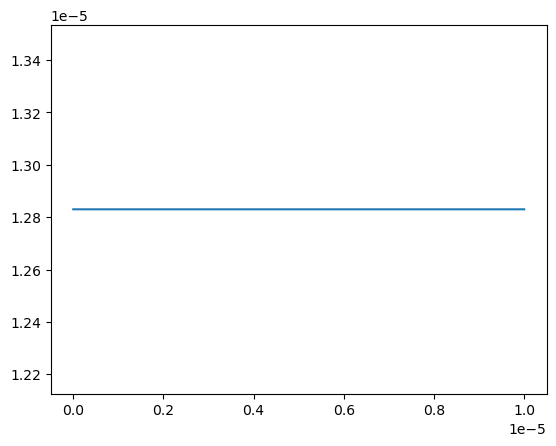

In [139]:
plt.plot(x[0],y[20])

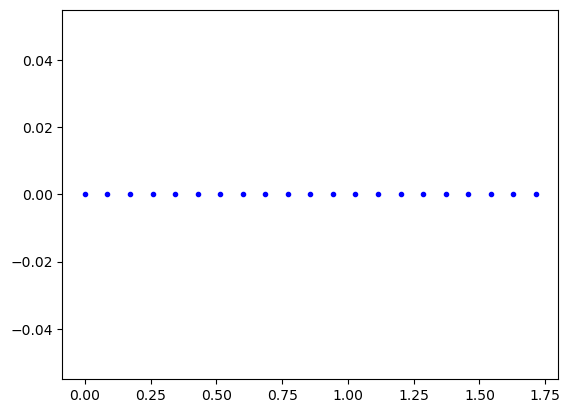

In [140]:
plt.plot(vin_sweep, fout_sweep, 'b.')